# Diesel Importación

In [ ]:
!pip install "statsmodels==0.11.1"
!pip install prophet

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from google.colab import files
import io
import datetime

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

from prophet import Prophet

import datetime
from datetime import datetime


     |████████████████████████████████| 65 kB 2.2 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
     |████████████████████████████████| 179 kB 12.0 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6638803 sha256=ba6a2101b36f80970e5e750f1c81b21d568a5b47533d1bbef0220d99b74c527c
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [34]:
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['DatosImportacionCombustibles.csv']))

data['date'] = data['Anio'].map(str) + '-' + data['Mes'].map(str)
data['date'] = pd.to_datetime(data['date'], format='%Y-%m').dt.strftime('%Y-%m')

data['date'] = pd.to_datetime(data['date'], format='%Y-%m')
data.index = data.date


Saving DatosImportacionCombustibles.csv to DatosImportacionCombustibles (2).csv


In [4]:
data.head()

,Unnamed: 0,Anio,Mes,GasolinaSuper,GasolinaRegular,TotalGasolinas,Diesel,DieselLS,DieselULS,TotalDiesel,GLP,GasolinaAviacion,Kerosina,TurboJet,Bunker,Asfalto,PetCoke,AceitesLubricantes,GrasasLubricantes,Solventes,Naftas,Ceras,Butano,PetroleoReconstit,MTBE,Orimulsion,MezclasOleosas,PetroleoCrudo,TotalMensual
0,3,2001,1,373963.96,177776.50,551740.46,566101.99,NaN,NaN,566101.99,194065.74,820.0,33834.03,NaN,214581.84,27748.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715344.0,8402.0,NaN,NaN,NaN,2312639.05
1,4,2001,2,243091.07,123115.99,366207.06,489525.80,NaN,NaN,489525.80,170703.38,3054.0,67439.95,NaN,294609.00,7503.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370166.0,NaN,NaN,NaN,NaN,1769208.76
2,5,2001,3,312084.38,161726.42,473810.80,575559.68,NaN,NaN,575559.68,161837.37,677.0,31787.29,NaN,315263.80,26304.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360530.0,NaN,NaN,NaN,NaN,1945770.26
3,6,2001,4,285054.89,127338.74,412393.63,437745.42,NaN,NaN,437745.42,163048.64,3399.0,25801.18,NaN,205653.00,7885.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359527.0,8184.0,NaN,NaN,NaN,1623637.76
4,7,2001,5,300913.67,168730.19,469643.86,552609.13,NaN,NaN,552609.13,171518.86,585.0,45529.33,NaN,278371.30,8443.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,723346.0,12680.0,NaN,NaN,NaN,2262726.64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          245 non-null    int64  
 1   Anio                245 non-null    int64  
 2   Mes                 245 non-null    int64  
 3   GasolinaSuper       245 non-null    float64
 4   GasolinaRegular     245 non-null    float64
 5   TotalGasolinas      245 non-null    float64
 6   Diesel              204 non-null    float64
 7   DieselLS            41 non-null     float64
 8   DieselULS           20 non-null     float64
 9   TotalDiesel         245 non-null    float64
 10  GLP                 245 non-null    float64
 11  GasolinaAviacion    156 non-null    float64
 12  Kerosina            195 non-null    float64
 13  TurboJet            62 non-null     float64
 14  Bunker              245 non-null    float64
 15  Asfalto             235 non-null    float64
 16  PetCoke 

In [6]:
dataDiesel = data[['Anio', 'Mes', 'DieselLS']]

In [7]:
dataDiesel.head()

,Anio,Mes,DieselLS
0,2001,1,NaN
1,2001,2,NaN
2,2001,3,NaN
3,2001,4,NaN
4,2001,5,NaN


In [8]:
dataDiesel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Anio      245 non-null    int64  
 1   Mes       245 non-null    int64  
 2   DieselLS  41 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 5.9 KB


In [9]:
dataDiesel = dataDiesel.dropna()

In [10]:
dataDiesel['date'] = dataDiesel['Anio'].map(str) + '-' + dataDiesel['Mes'].map(str)
dataDiesel['date'] = pd.to_datetime(dataDiesel['date'], format='%Y-%m').dt.strftime('%Y-%m')

In [11]:
dataDiesel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 204 to 244
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Anio      41 non-null     int64  
 1   Mes       41 non-null     int64  
 2   DieselLS  41 non-null     float64
 3   date      41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.6+ KB


In [16]:
dataDiesel.count()

Anio        41
Mes         41
DieselLS    41
date        41
dtype: int64

# Serie Univariante


In [12]:
dataDiesel.head()

,Anio,Mes,DieselLS,date
204,2018,1,1153831.89,2018-01
205,2018,2,921684.12,2018-02
206,2018,3,889227.10,2018-03
207,2018,4,696962.77,2018-04
208,2018,5,1592580.34,2018-05


In [13]:
dataDiesel['date'] = pd.to_datetime(dataDiesel['date'], format='%Y-%m')

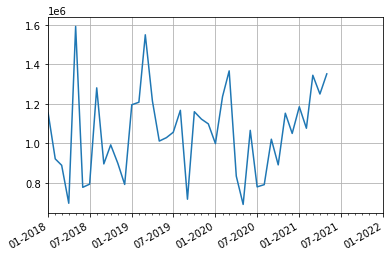

In [14]:
fig, ax = plt.subplots()
ax.plot('date', 'DieselLS', data=dataDiesel)

fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))

datemin = np.datetime64(dataDiesel['date'][204], 'Y') #204 porque es el primer indice
datemax = np.datetime64(dataDiesel['date'][244], 'Y') + np.timedelta64(1, 'Y') #244 porque es el ultimo indice

ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m')

ax.grid(True)

fig.autofmt_xdate()
plt.show()


## Descomposición de la serie en componentes

In [17]:

dataDiesel.index = dataDiesel.date
# data_importaciones.index = data_importaciones.Date

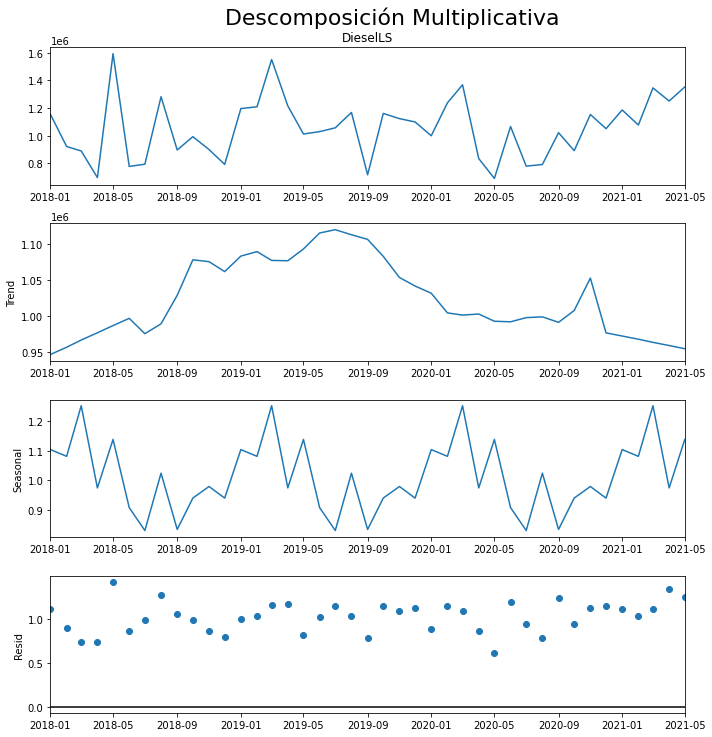

In [18]:
result_mul = seasonal_decompose(dataDiesel['DieselLS'], model='multiplicative', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
_ = result_mul.plot().suptitle('Descomposición Multiplicativa', fontsize=22, x=0.55, y=1.02)

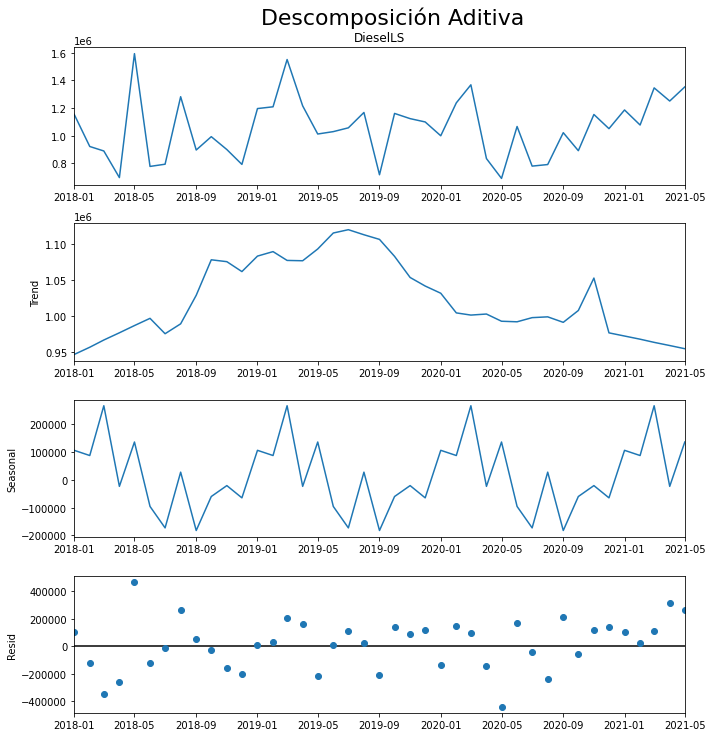

In [19]:
result_add = seasonal_decompose(dataDiesel['DieselLS'], model='additive', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
_ = result_add.plot().suptitle('Descomposición Aditiva', fontsize=22, x=0.55, y=1.02)

## Gráficos de Auto Correlación

In [32]:
# data.count()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning:

invalid value encountered in sqrt



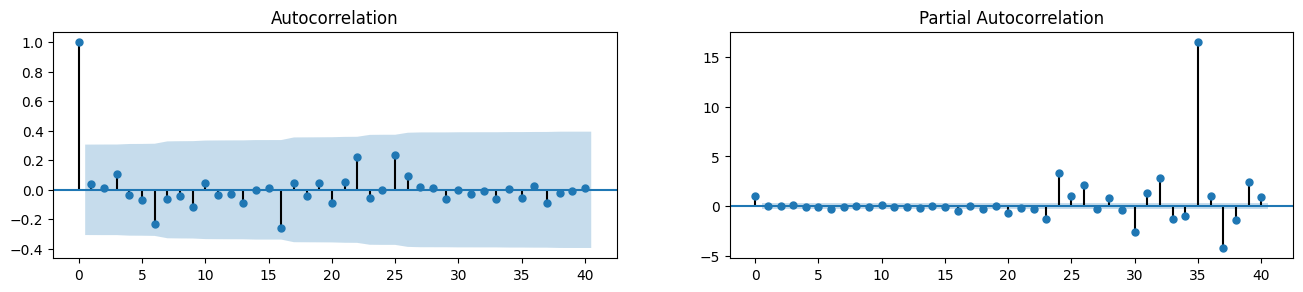

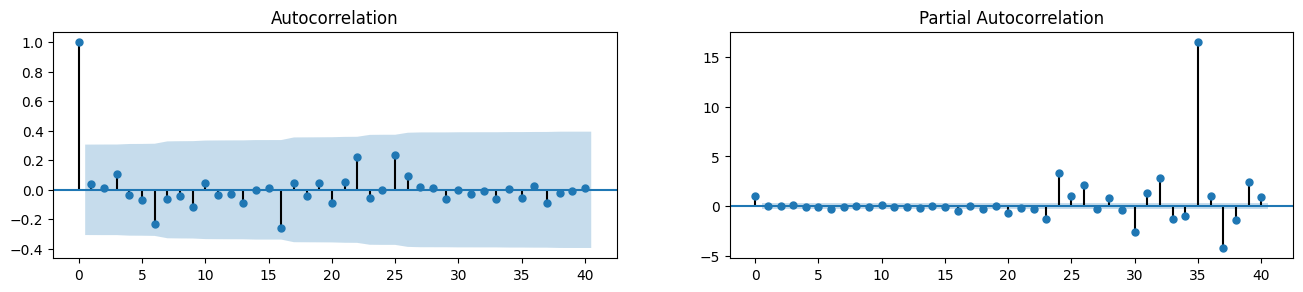

In [38]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(dataDiesel.DieselLS.tolist(), lags=40, ax=axes[0])
plot_pacf(dataDiesel.DieselLS.tolist(), lags=40, ax=axes[1])

## Prueba de Dickey-Fuller

In [39]:
result = adfuller(dataDiesel.DieselLS, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -5.795509448457476
p-value: 4.762366648355761e-07
Critial Values:
   1%, -3.6055648906249997
Critial Values:
   5%, -2.937069375
Critial Values:
   10%, -2.606985625


# Modelo ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:               DieselLS   No. Observations:                   41
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -554.368
Date:                Sat, 07 Aug 2021   AIC                           1116.735
Time:                        00:41:18   BIC                           1123.491
Sample:                    01-01-2018   HQIC                          1119.178
                         - 05-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9173      4.452     -0.206      0.837      -9.644       7.809
ma.L1          0.1950      4.459      0.044      0.965      -8.544       8.934
ma.L2         -0.6600      3.262     -0.202      0.8

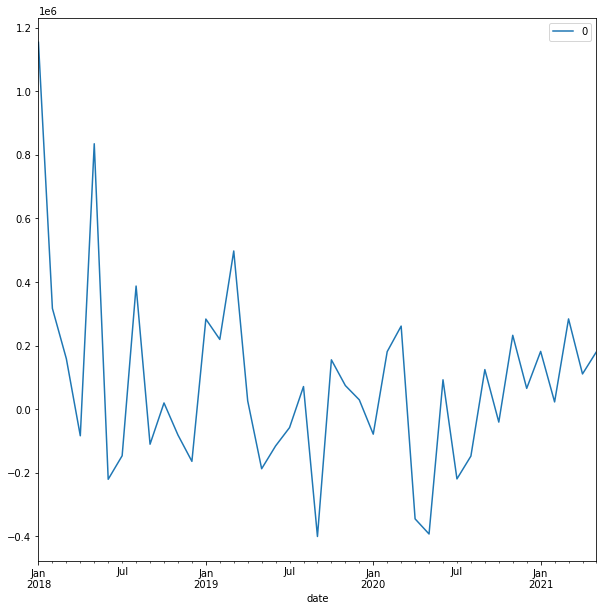

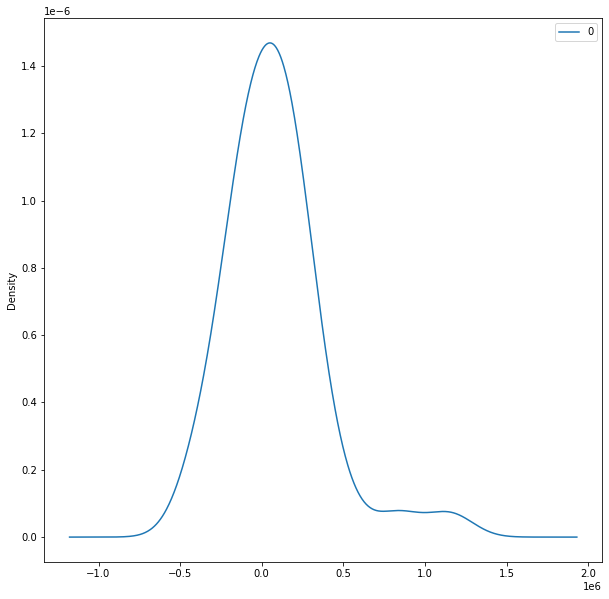

                  0
count  4.100000e+01
mean   7.749595e+04
std    2.957293e+05
min   -4.002786e+05
25%   -1.100711e+05
50%    6.552436e+04
75%    1.818168e+05
max    1.153832e+06


In [40]:
model = ARIMA(dataDiesel['DieselLS'], order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

# Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


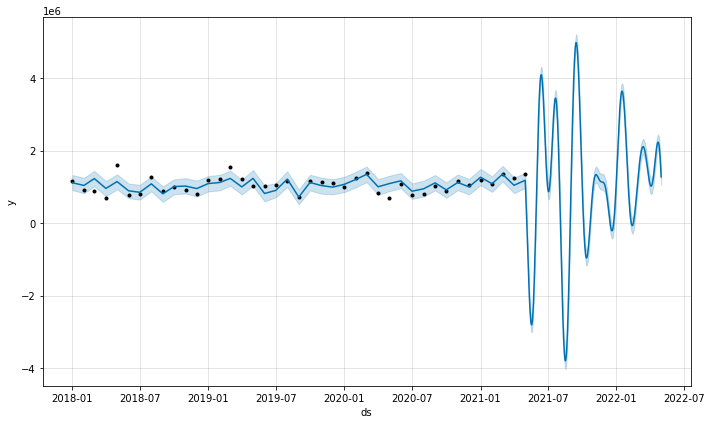

In [42]:

dataDiesel["ds"] = dataDiesel.date
dataDiesel["y"] = dataDiesel.DieselLS

data = dataDiesel[["ds","y"]]

m = Prophet()
m.fit(dataDiesel)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m.plot(forecast)

# Predicciones

## Ultimos 3 años

In [45]:
sarima_model = SARIMAX(dataDiesel.DieselLS, order=(2,0,1), seasonal_order=(2, 1, 0, 24))
results = sarima_model.fit()
results.aic

pred = results.get_prediction(start=pd.to_datetime('01/01/2018'), dynamic=False)
pred_ci = pred.conf_int()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



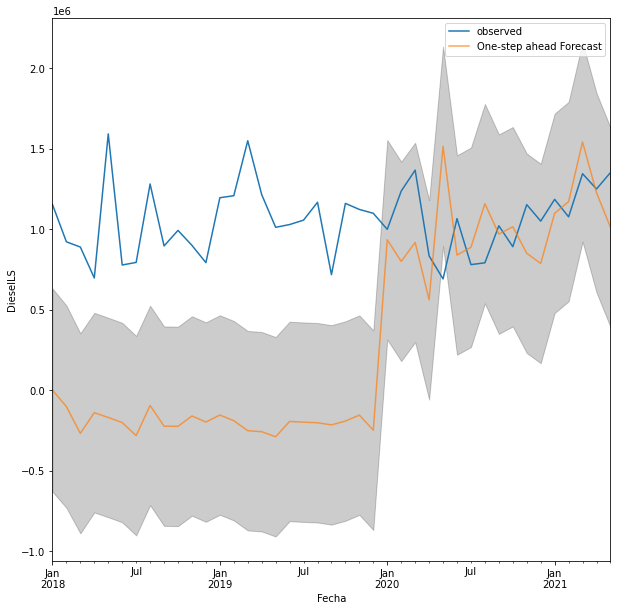

In [49]:
ax = dataDiesel.DieselLS['01/01/2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
 pred_ci.iloc[:, 0],
 pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Fecha')
ax.set_ylabel('DieselLS')
plt.legend()

plt.show()

## Año 2021

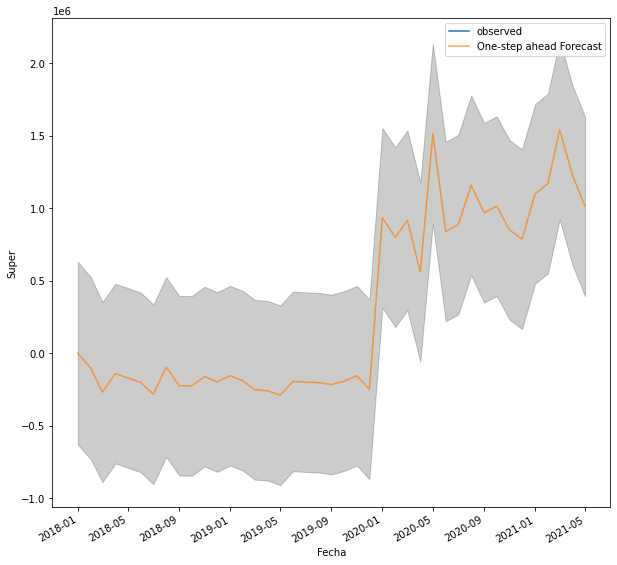

In [50]:
ax = dataDiesel.DieselLS['31/12/2021':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
 pred_ci.iloc[:, 0],
 pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Fecha')
ax.set_ylabel('Super')
plt.legend()

plt.show()